In [1]:
import numpy as np
import pandas as pd
import os
import glob

def extract(file_path):
    if not os.path.isfile(file_path):
        return -1, -1, -1

    with open(file_path, 'r') as f:
        lines = f.readlines()

    test_roc, test_precision, test_NEF = -1, -1, -1
    for line in lines:
        if 'test precision' in line:
            line = line.strip().split(':')
            test_precision = float(line[1])
        if 'test roc' in line:
            line = line.strip().split(':')
            test_roc = float(line[1])
        if 'ratio: 0.01, NEF:' in line:
            line = line.strip().replace('NEF:', '').split(',')
            test_NEF = float(line[1])
    return test_roc, test_precision, test_NEF

def update_name(name):
    if name == 'random_forest_classification':
        name = 'RF-C'
    if name == 'xgboost_classification':
        name = 'XGB-C'
    if name == 'xgboost_regression':
        name = 'XGB-R'
    if name == 'single_deep_classification':
        name = 'NN-C'
    if name == 'single_deep_regression':
        name = 'NN-R'
    if name == 'ensemble':
        name = 'Ensemble, model-based'
    if name =='ensemble_02':
        name = 'Ensemble, max-vote'
    if name == 'baseline':
        name = 'Similarity Baseline'
    return name

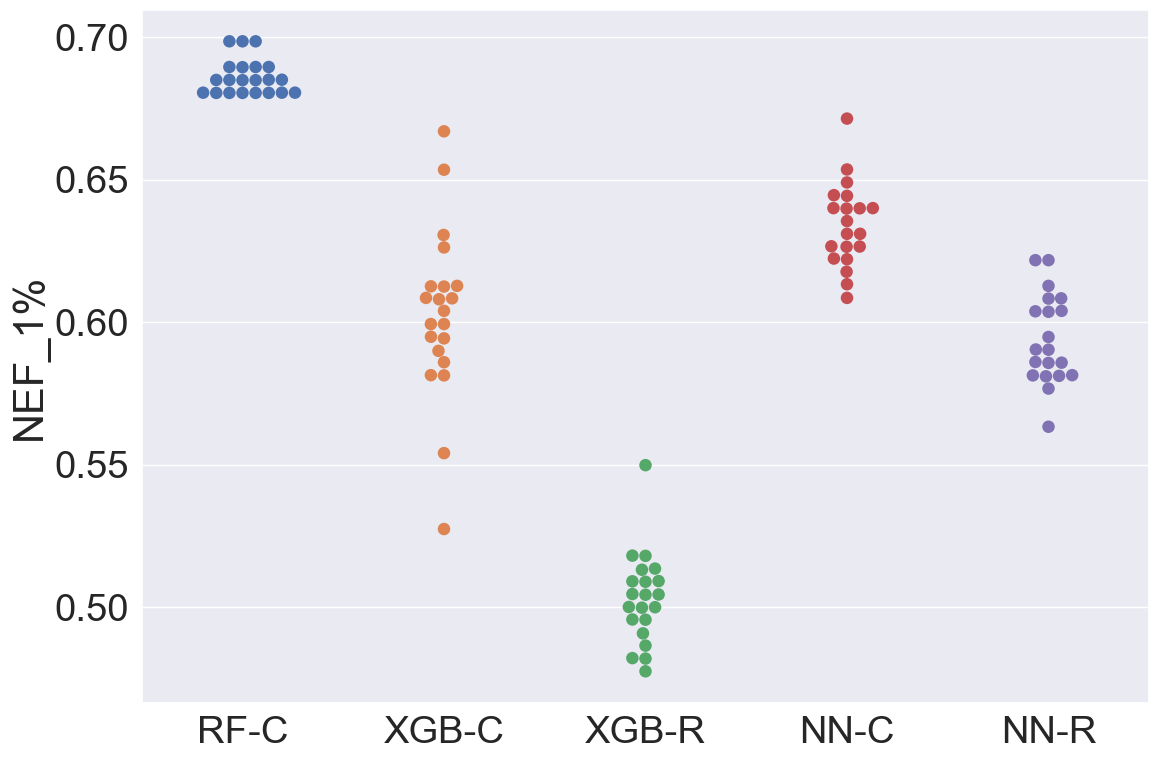

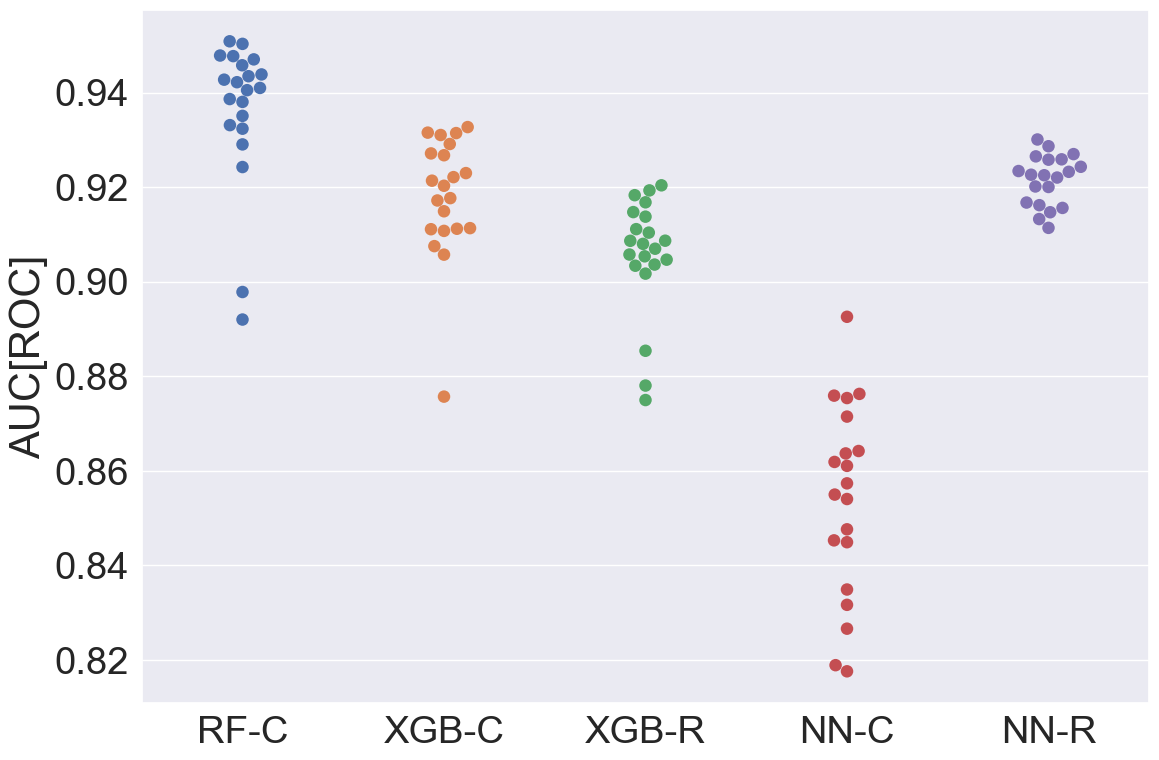

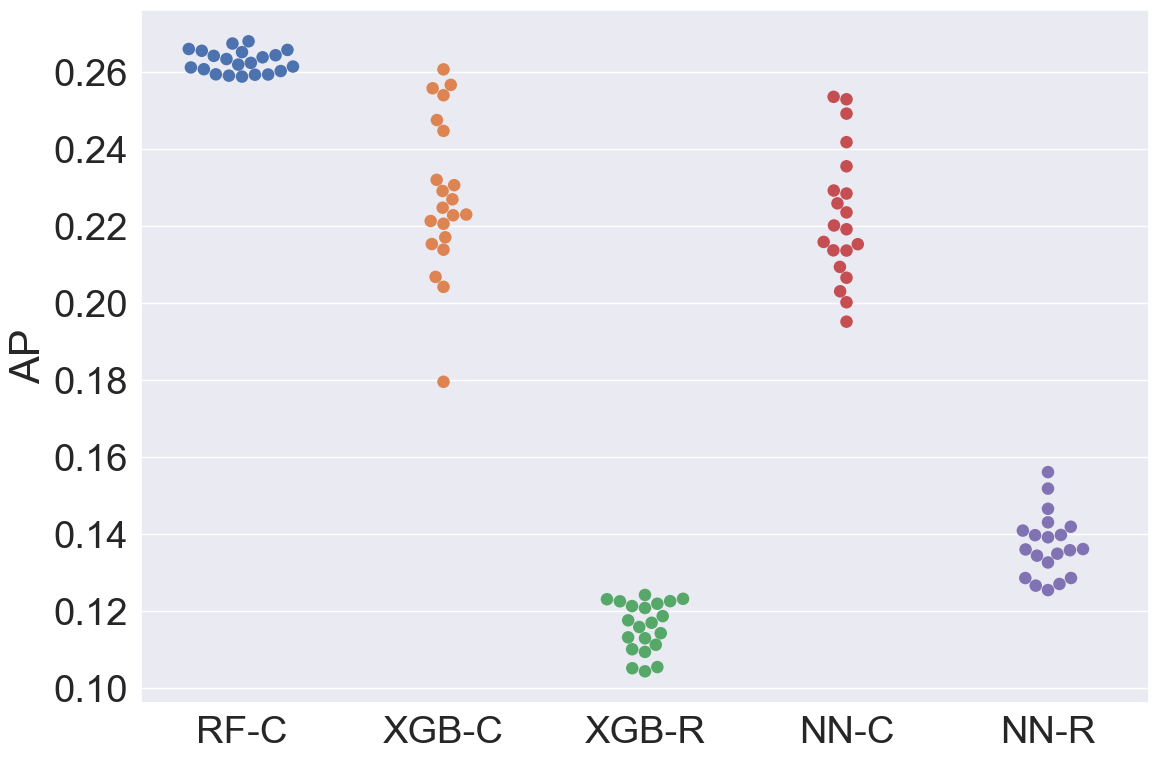

In [2]:
model_list = [
        'random_forest_classification',
        'xgboost_classification', 'xgboost_regression',
        'single_deep_classification', 'single_deep_regression'
    ]

model_process_num_list = {
    'random_forest_classification': [139, 69, 111, 212, 210, 148, 28, 61, 124, 130, 131, 141, 14, 38, 165, 65, 123, 94, 3, 88, 72],
    'xgboost_classification': [140, 967, 960, 807, 263, 694, 440, 47, 116, 792, 663, 32, 564, 950, 735, 84, 364, 605, 431, 55, 388],
    'xgboost_regression': [187, 6, 514, 507, 880, 440, 605, 718, 754, 409, 586, 214, 753, 65, 294, 911, 721, 81, 321, 545, 280],
    'single_deep_classification': [356, 404, 215, 93, 254, 88, 423, 47, 363, 132, 5, 385, 370, 29, 415, 54, 124, 183, 180, 416],
    'single_deep_regression': [199, 323, 114, 123, 47, 175, 17, 178, 106, 265, 67, 157, 369, 115, 191, 20, 27, 108, 270, 45],
    'ensemble': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'ensemble_02': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

model_name_id = []
hyper_parameter_id = []
hyper_parameter_result_roc = []
hyper_parameter_result_precision = []
hyper_parameter_result_NEF = []
    
for model in model_list:
    number = len(model_process_num_list[model])

    for running_process in model_process_num_list[model]:
        test_roc_list, test_precision_list, test_NEF_list = [], [], []
        for idx in range(4):
            file_path = '../output/{}/{}_{}_{}.out'.format(model, model, running_process, idx)
            test_roc, test_precision, test_NEF = extract(file_path)
            if test_roc == -1 and test_precision == -1:
                print('missing file: {}'.format(file_path))
            if test_roc != -1:
                test_roc_list.append(test_roc)
            if test_precision != -1:
                test_precision_list.append(test_precision)
            if test_NEF != -1:
                test_NEF_list.append(test_NEF)
        
        model_name_id.append(update_name(model))
        hyper_parameter_id.append(running_process)
        hyper_parameter_result_roc.append(np.mean(test_roc_list))
        hyper_parameter_result_precision.append(np.mean(test_precision_list))
        hyper_parameter_result_NEF.append(np.mean(test_NEF_list))


font_scale=2.5
p_size=9
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=font_scale)
figsize=(13, 9)

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

plt.figure(figsize=figsize)
sns.swarmplot(x=model_name_id, y=hyper_parameter_result_NEF, size=p_size, hue=model_name_id, legend=False)
plt.ylabel('NEF_1%')
plt.savefig('./cv_figures/cv_results_nef.png')
plt.savefig('./cv_figures/cv_results_nef.svg')
plt.show()

plt.figure(figsize=figsize)
sns.swarmplot(x=model_name_id, y=hyper_parameter_result_roc, size=p_size, hue=model_name_id, legend=False)
plt.ylabel('AUC[ROC]')
plt.savefig('./cv_figures/cv_results_roc.png')
plt.savefig('./cv_figures/cv_results_roc.svg')
plt.show()

plt.figure(figsize=figsize)
sns.swarmplot(x=model_name_id, y=hyper_parameter_result_precision, size=p_size, hue=model_name_id, legend=False)
plt.ylabel('AP')
plt.savefig('./cv_figures/cv_results_pr.png')
plt.savefig('./cv_figures/cv_results_pr.svg')
plt.show()

In [3]:
x = pd.DataFrame(data=model_name_id,
             columns=['model'])
x['hp_id'] = hyper_parameter_id
x['NEF'] = hyper_parameter_result_NEF
x['ROC'] = hyper_parameter_result_roc
x['PR'] = hyper_parameter_result_precision

for model in x['model'].unique().tolist():
    hp_list = x[x['model'] == model].sort_values('NEF', ascending=False)['hp_id'].tolist()
    
    
    #print('{}: {}'.format(model, ', '.join(['{}'.format(i) for i in hp_list])))

hp_list = [384, 261, 7, 137, 138, 395, 142, 143, 275, 281, 431, 284, 389, 35, 420, 399, 166, 369, 297, 391, 301, 303, 48, 398, 314, 317, 320, 69, 225, 73, 79, 336, 376, 338, 340, 341, 342, 429, 346, 91, 92, 378, 95, 97, 294, 231, 234, 237, 239, 368, 113, 403, 372, 382, 120, 122, 251, 380, 126]
print('{}'.format(', '.join(['{}'.format(i) for i in sorted(hp_list)])))

7, 35, 48, 69, 73, 79, 91, 92, 95, 97, 113, 120, 122, 126, 137, 138, 142, 143, 166, 225, 231, 234, 237, 239, 251, 261, 275, 281, 284, 294, 297, 301, 303, 314, 317, 320, 336, 338, 340, 341, 342, 346, 368, 369, 372, 376, 378, 380, 382, 384, 389, 391, 395, 398, 399, 403, 420, 429, 431


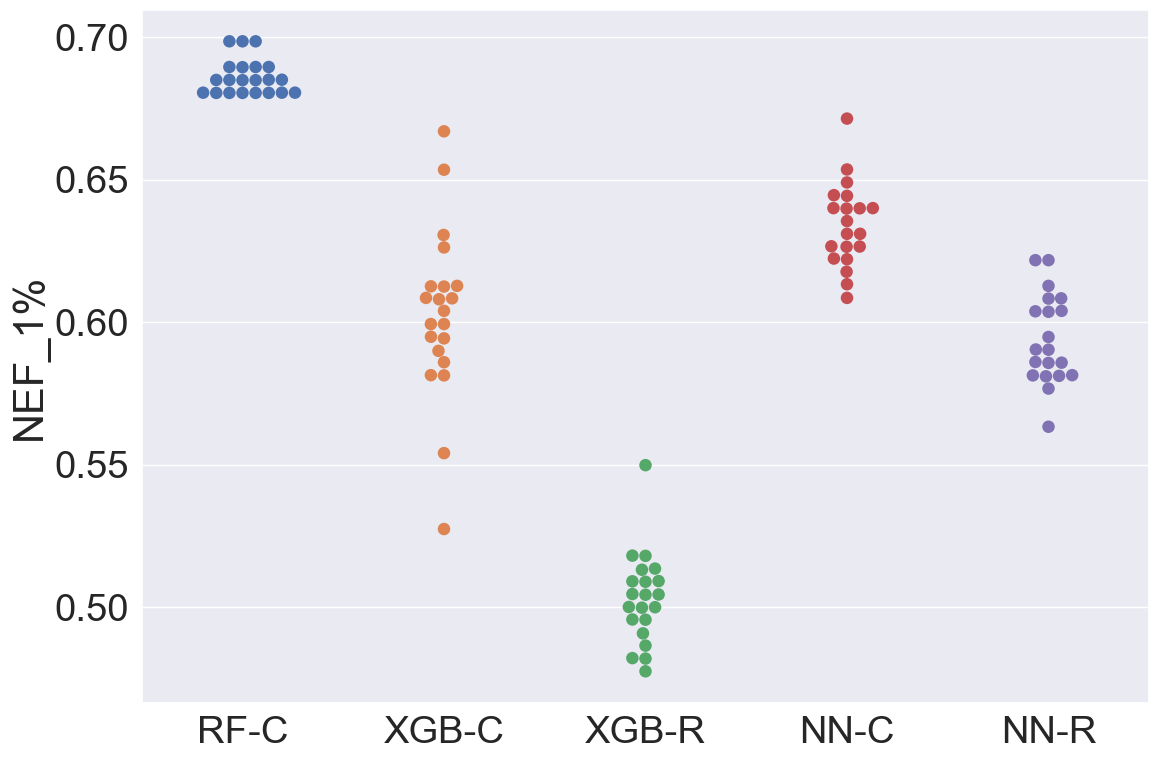

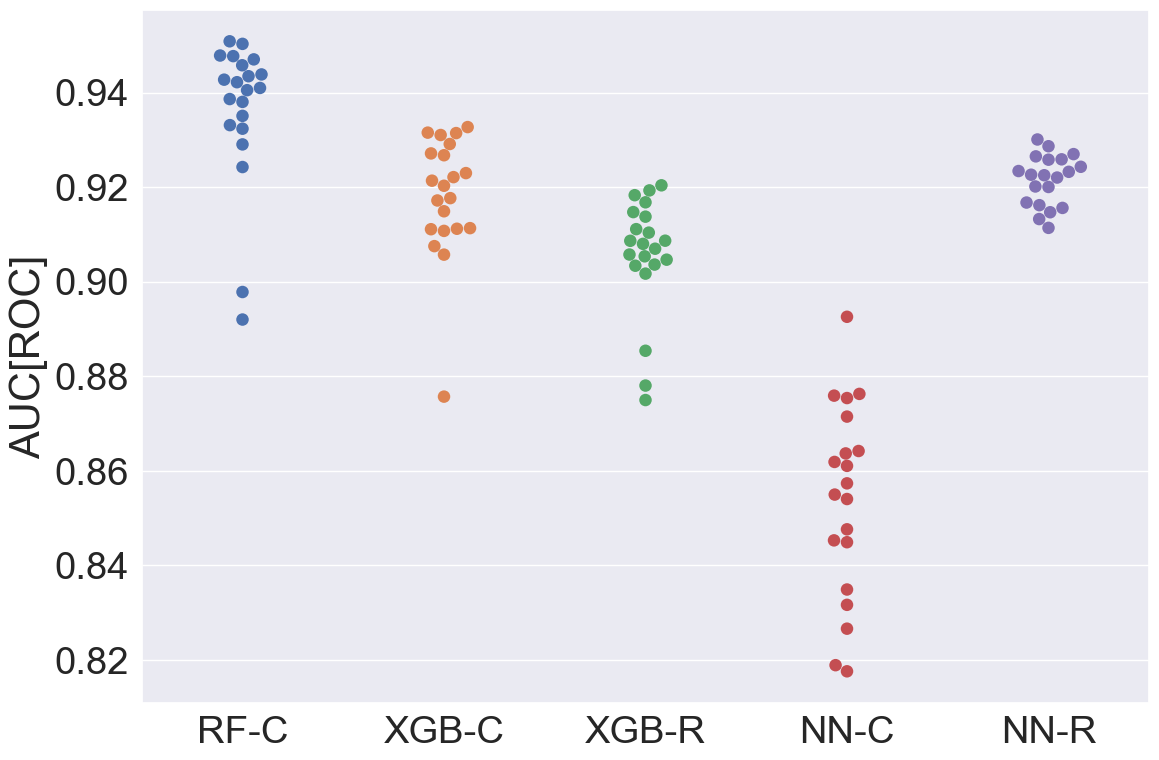

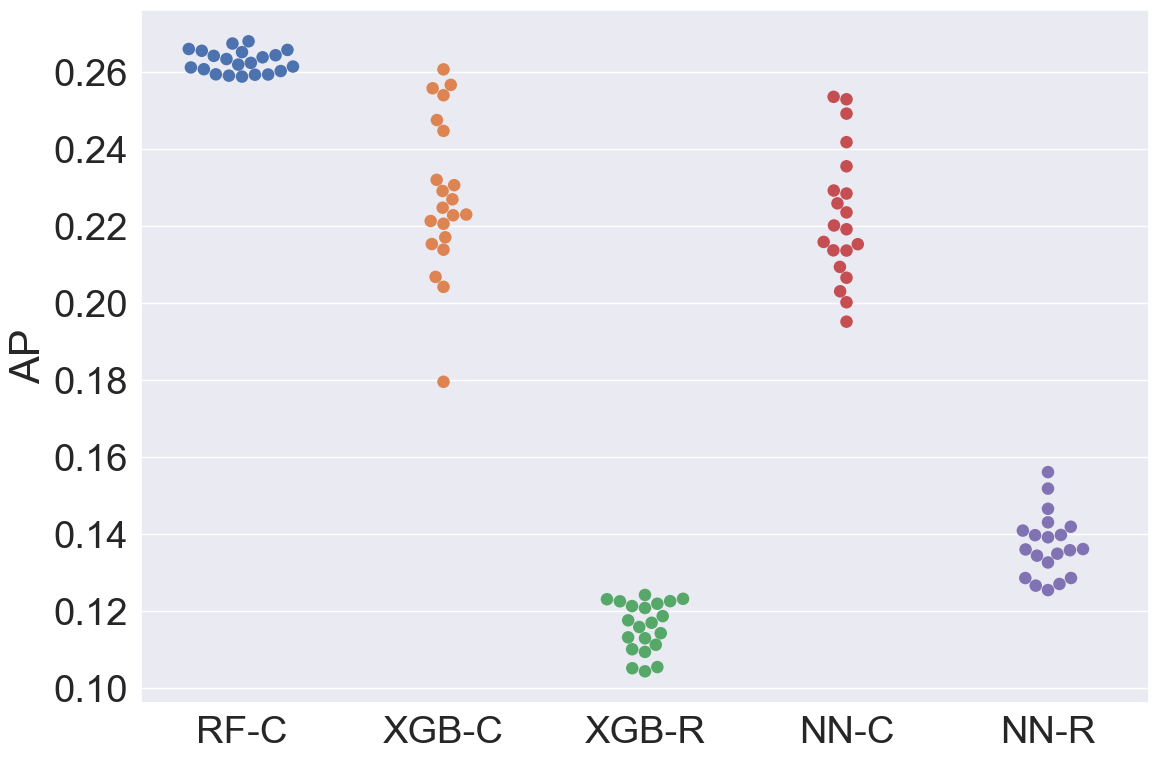

In [4]:
model_list = [
        'random_forest_classification',
        'xgboost_classification', 'xgboost_regression',
        'single_deep_classification', 'single_deep_regression'
    ]

model_process_num_list = {
    'random_forest_classification': [139, 69, 111, 212, 210, 148, 28, 61, 124, 130, 131, 141, 14, 38, 165, 65, 123, 94, 3, 88, 72],
    'xgboost_classification': [140, 967, 960, 807, 263, 694, 440, 47, 116, 792, 663, 32, 564, 950, 735, 84, 364, 605, 431, 55, 388],
    'xgboost_regression': [187, 6, 514, 507, 880, 440, 605, 718, 754, 409, 586, 214, 753, 65, 294, 911, 721, 81, 321, 545, 280],
    'single_deep_classification': [356, 404, 215, 93, 254, 88, 423, 47, 363, 132, 5, 385, 370, 29, 415, 54, 124, 183, 180, 416],
    'single_deep_regression': [199, 323, 114, 123, 47, 175, 17, 178, 106, 265, 67, 157, 369, 115, 191, 20, 27, 108, 270, 45],
    'ensemble': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'ensemble_02': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

model_name_id = []
hyper_parameter_result_roc = []
hyper_parameter_result_precision = []
hyper_parameter_result_NEF = []
    
for model in model_list:
    number = len(model_process_num_list[model])

    for running_process in model_process_num_list[model]:
        test_roc_list, test_precision_list, test_NEF_list = [], [], []
        for idx in range(4):
            file_path = '../output/{}/{}_{}_{}.out'.format(model, model, running_process, idx)
            test_roc, test_precision, test_NEF = extract(file_path)
            if test_roc == -1 and test_precision == -1:
                print('missing file: {}'.format(file_path))
            if test_roc != -1:
                test_roc_list.append(test_roc)
            if test_precision != -1:
                test_precision_list.append(test_precision)
            if test_NEF != -1:
                test_NEF_list.append(test_NEF)
        
        model_name_id.append(update_name(model))
        hyper_parameter_result_roc.append(np.mean(test_roc_list))
        hyper_parameter_result_precision.append(np.mean(test_precision_list))
        hyper_parameter_result_NEF.append(np.mean(test_NEF_list))


font_scale=2.5
p_size=9
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=font_scale)
figsize=(13, 9)

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

plt.figure(figsize=figsize)
sns.swarmplot(x=model_name_id, y=hyper_parameter_result_NEF, size=p_size, hue=model_name_id, legend=False)
plt.ylabel('NEF_1%')
plt.savefig('./cv_figures/cv_results_nef.png')
plt.savefig('./cv_figures/cv_results_nef.svg')
plt.show()

plt.figure(figsize=figsize)
sns.swarmplot(x=model_name_id, y=hyper_parameter_result_roc, size=p_size, hue=model_name_id, legend=False)
plt.ylabel('AUC[ROC]')
plt.savefig('./cv_figures/cv_results_roc.png')
plt.savefig('./cv_figures/cv_results_roc.svg')
plt.show()

plt.figure(figsize=figsize)
sns.swarmplot(x=model_name_id, y=hyper_parameter_result_precision, size=p_size, hue=model_name_id, legend=False)
plt.ylabel('AP')
plt.savefig('./cv_figures/cv_results_pr.png')
plt.savefig('./cv_figures/cv_results_pr.svg')
plt.show()

In [5]:
model_list = [
        'random_forest_classification',
        'xgboost_classification', 'xgboost_regression',
        'single_deep_classification', 'single_deep_regression',
        'baseline',
        'ensemble', 'ensemble_02'
    ]

model_process_num_list = {
    'random_forest_classification': [139],
    'xgboost_classification': [140],
    'xgboost_regression': [187],
    'single_deep_classification': [356],
    'single_deep_regression': [199],
    'baseline': [0],
    'ensemble': [0],
    'ensemble_02': [0],
}

name_list, roc_list, pr_list, NEF_list = [], [], [], []
for model in model_list:
    number = len(model_process_num_list[model])

    for running_process in model_process_num_list[model]:
        if model == 'ensemble' or model == 'ensemble_02':
            file_path = '../output/{}/{}.out'.format(model, running_process)
        else:
            file_path = '../output/{}/{}_{}_4.out'.format(model, model, running_process)

        test_roc, test_pr, test_NEF = extract(file_path)
        name_list.append(update_name(model))
        roc_list.append(test_roc)
        pr_list.append(test_pr)
        NEF_list.append(test_NEF)

for name,roc,pr,NEF in zip(name_list, roc_list, pr_list, NEF_list):
    print('{}&{:.3f}&{:.3f}&{:.3f}\\\\'.format(name, roc, pr, NEF)) 

RF-C&0.935&0.174&0.618\\
XGB-C&0.923&0.171&0.582\\
XGB-R&0.842&0.018&0.255\\
NN-C&0.815&0.157&0.545\\
NN-R&0.923&0.071&0.418\\
Similarity Baseline&0.811&0.088&0.400\\
Ensemble, model-based&0.935&0.174&0.618\\
Ensemble, max-vote&0.935&0.174&0.618\\


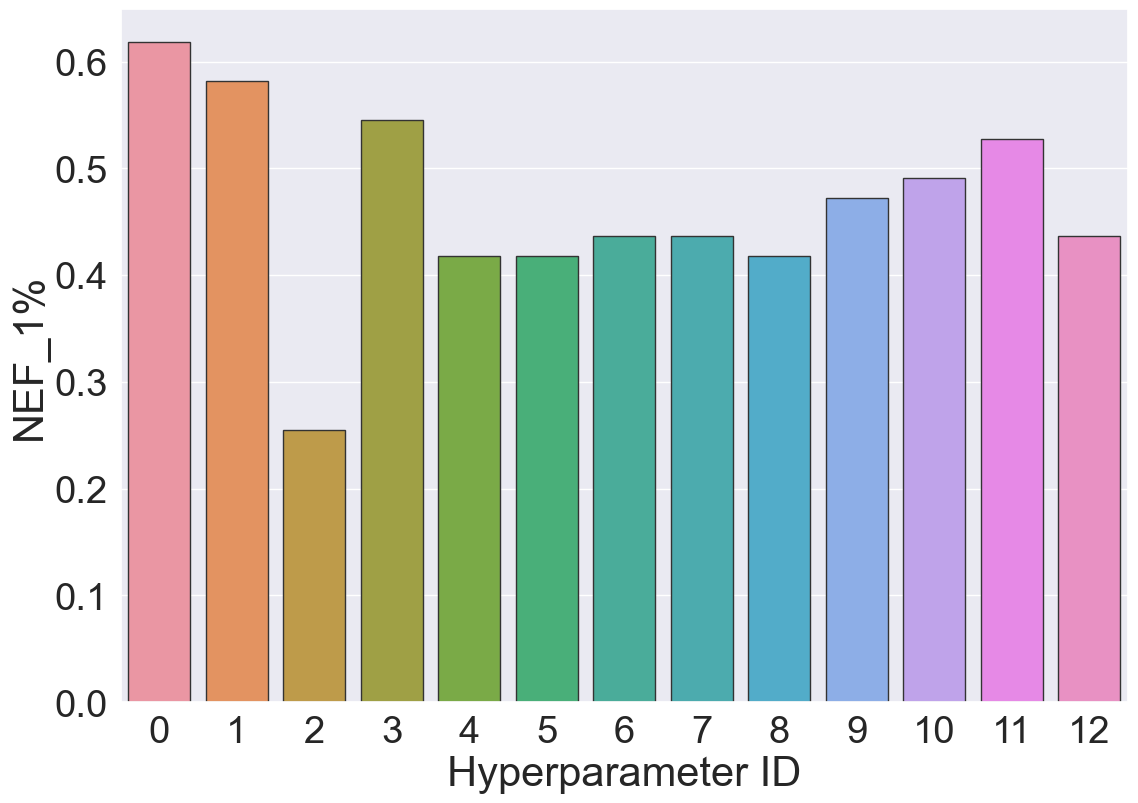

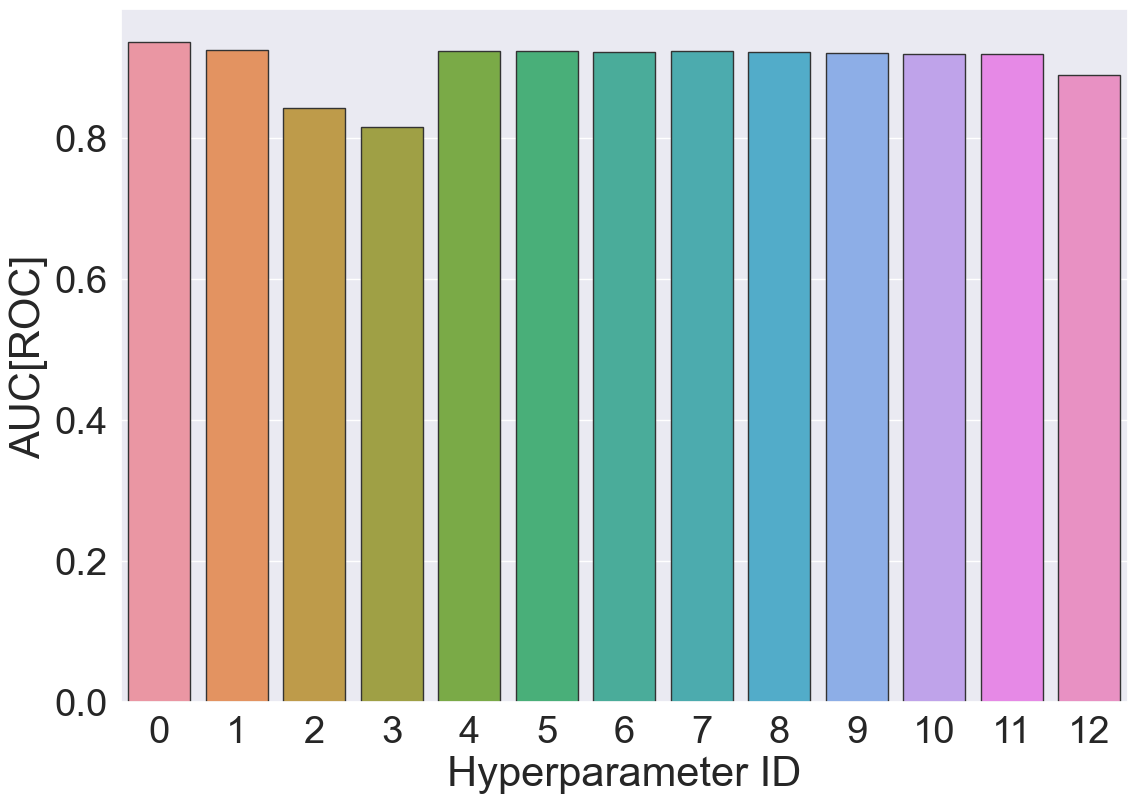

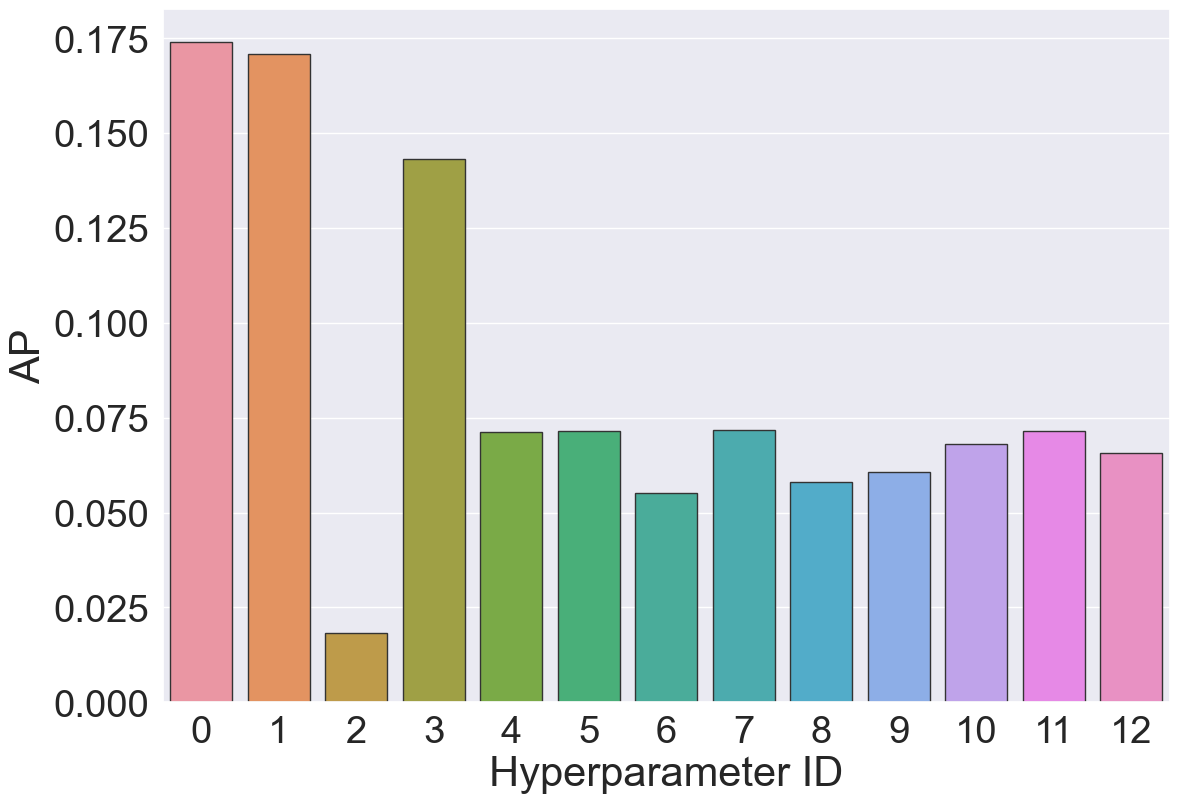

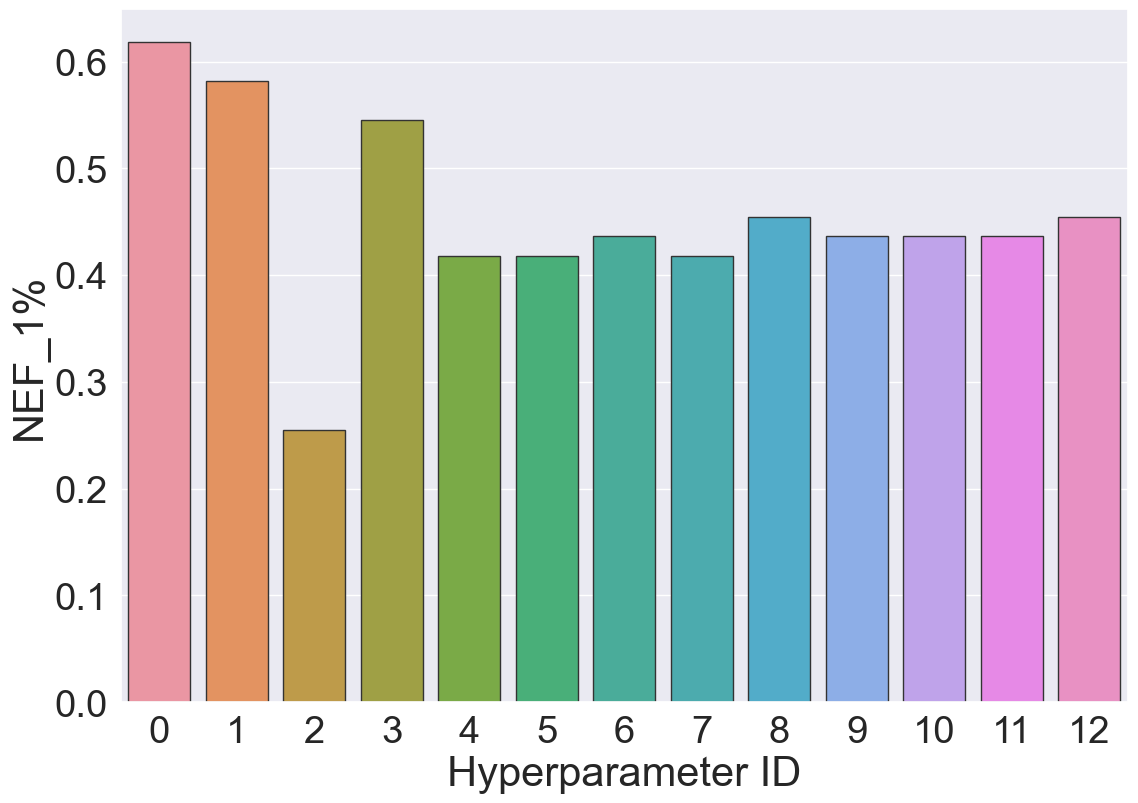

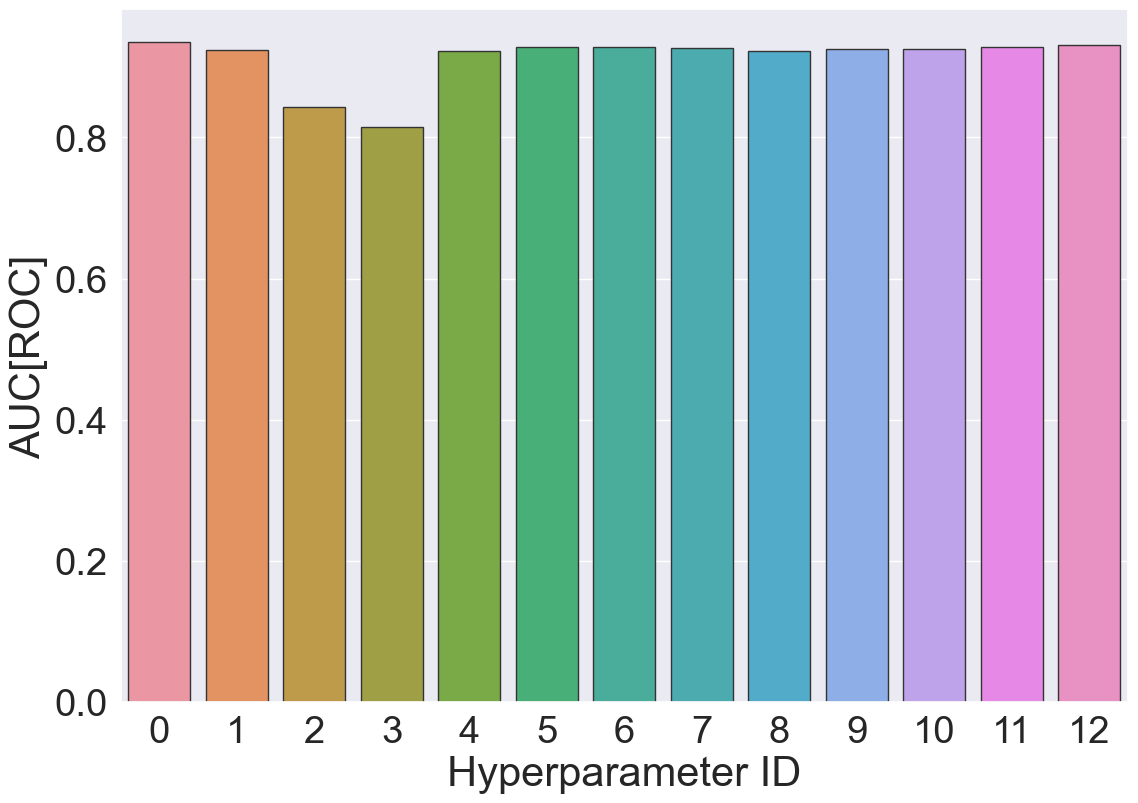

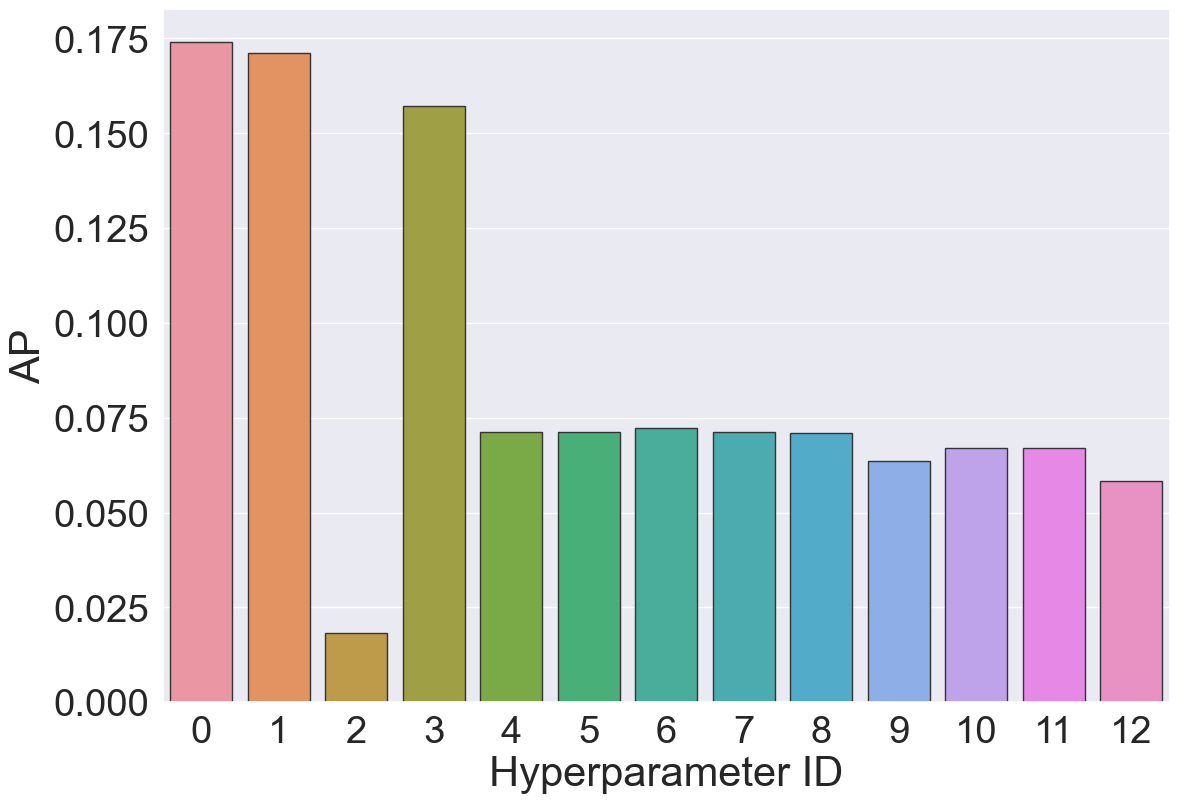

In [6]:
model_list = [
        'random_forest_classification',
        'xgboost_classification', 'xgboost_regression',
        'single_deep_classification', 'single_deep_regression',
        'baseline',
        'ensemble', 'ensemble_02'
    ]

model_process_num_list = {
    'random_forest_classification': [139],
    'xgboost_classification': [140],
    'xgboost_regression': [187],
    'single_deep_classification': [356],
    'single_deep_regression': [199],
    'baseline': [0],
    'ensemble': [0],
    'ensemble_02': [0],
}

roc_list, pr_list, NEF_list = [], [], []
model = 'ensemble'
for running_process in range(13):
    file_path = '../output/{}/{}.out'.format(model, running_process)
    
    test_roc, test_pr, test_NEF = extract(file_path)
    roc_list.append(test_roc)
    pr_list.append(test_pr)
    NEF_list.append(test_NEF)
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=font_scale)
figsize=(13, 9)

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

plt.figure(figsize=figsize)
sns.barplot(x=np.arange(13), y=NEF_list, edgecolor=".2")
plt.ylabel('NEF_1%')
plt.xlabel('Hyperparameter ID')
plt.savefig('./cv_figures/ms_{}_results_nef.png'.format(model))
plt.savefig('./cv_figures/ms_{}_results_nef.svg'.format(model))
plt.show()
plt.figure(figsize=figsize)
sns.barplot(x=np.arange(13), y=roc_list, edgecolor=".2")
plt.ylabel('AUC[ROC]')
plt.xlabel('Hyperparameter ID')
plt.savefig('./cv_figures/ms_{}_results_roc.png'.format(model))
plt.savefig('./cv_figures/ms_{}_results_roc.svg'.format(model))
plt.show()
plt.figure(figsize=figsize)
sns.barplot(x=np.arange(13), y=pr_list, edgecolor=".2")
plt.ylabel('AP')
plt.xlabel('Hyperparameter ID')
plt.savefig('./cv_figures/ms_{}_results_pr.png'.format(model))
plt.savefig('./cv_figures/ms_{}_results_pr.svg'.format(model))
plt.show()

roc_list, pr_list, NEF_list = [], [], []
model = 'ensemble_02'
for running_process in range(13):
    file_path = '../output/{}/{}.out'.format(model, running_process)
    
    test_roc, test_pr, test_NEF = extract(file_path)
    roc_list.append(test_roc)
    pr_list.append(test_pr)
    NEF_list.append(test_NEF)
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=font_scale)
figsize=(13, 9)

plt.figure(figsize=figsize)
sns.barplot(x=np.arange(13), y=NEF_list, edgecolor=".2")
plt.ylabel('NEF_1%')
plt.xlabel('Hyperparameter ID')
plt.savefig('./cv_figures/ms_{}_results_nef.png'.format(model))
plt.savefig('./cv_figures/ms_{}_results_nef.svg'.format(model))
plt.show()
plt.figure(figsize=figsize)
sns.barplot(x=np.arange(13), y=roc_list, edgecolor=".2")
plt.ylabel('AUC[ROC]')
plt.xlabel('Hyperparameter ID')
plt.savefig('./cv_figures/ms_{}_results_roc.png'.format(model))
plt.savefig('./cv_figures/ms_{}_results_roc.svg'.format(model))
plt.show()
plt.figure(figsize=figsize)
sns.barplot(x=np.arange(13), y=pr_list, edgecolor=".2")
plt.ylabel('AP')
plt.xlabel('Hyperparameter ID')
plt.savefig('./cv_figures/ms_{}_results_pr.png'.format(model))
plt.savefig('./cv_figures/ms_{}_results_pr.svg'.format(model))
plt.show()

In [7]:
model_list = [
        'random_forest_classification',
        'xgboost_classification', 'xgboost_regression',
        'single_deep_classification', 'single_deep_regression'
    ]

model_process_num_list = {
    'random_forest_classification': [139, 69, 111, 212, 210, 148, 28, 61, 124, 130, 131, 141, 14, 38, 165, 65, 123, 94, 3, 88, 72],
    'xgboost_classification': [140, 967, 960, 807, 263, 694, 440, 47, 116, 792, 663, 32, 564, 950, 735, 84, 364, 605, 431, 55, 388],
    'xgboost_regression': [187, 6, 514, 507, 880, 440, 605, 718, 754, 409, 586, 214, 753, 65, 294, 911, 721, 81, 321, 545, 280],
    'single_deep_classification': [356, 404, 215, 93, 254, 88, 423, 47, 363, 132, 5, 385, 370, 29, 415, 54, 124, 183, 180, 416],
    'single_deep_regression': [199, 323, 114, 123, 47, 175, 17, 178, 106, 265, 67, 157, 369, 115, 191, 20, 27, 108, 270, 45],
    'ensemble': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'ensemble_02': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

for k in model_list:
    print(k, len(model_process_num_list[k]))

random_forest_classification 21
xgboost_classification 21
xgboost_regression 21
single_deep_classification 20
single_deep_regression 20
